# Предсказание ранней повторной госпитализации

Задача заключается в прогнозировании повторной госпитализации пациента на основе данных о диабете.

Датасет [_Diabetes 130-US hospitals for years 1999-2008 Data Set_](https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008#) представляет информацию о клинической помощи, оказанной в течение 10 лет в 130 больницах США. Он содержит 50 характеристик, описывающих данные о больницах и результаты лечения пациентов.

Показатели ранней повторной госпитализации могут служить важным показателем качества лекарственной терапии и систем здравоохранения в целом. Частая повторная госпитализация обычно указывает на неэффективность применяемых лекарственных препаратов и методов лечения.

Цель данного проекта заключается в разработке модели, способной предсказывать вероятность ранней повторной госпитализации (в течение месяца). 

In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
import category_encoders as ce  # библиотека для кодирования категориальных признаков
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
path1='https://raw.githubusercontent.com/Falirchik/ML/main/diabetic_data.csv'
Y = pd.read_csv(path1)


Y.head(10)#Output our data

C:\Users\nikki\AppData\Local\Temp\ipykernel_14920\3253561709.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  Y = pd.read_csv(path1)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type,discharge_disposition,admission_source,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,NaN,Not Mapped,Physician Referral,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,Emergency,Discharged to home,Emergency Room,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,Emergency,Discharged to home,Emergency Room,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,Emergency,Discharged to home,Emergency Room,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,Emergency,Discharged to home,Emergency Room,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),NaN,Urgent,Discharged to home,Clinic Referral,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),NaN,Elective,Discharged to home,Clinic Referral,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),NaN,Emergency,Discharged to home,Emergency Room,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),NaN,Urgent,Discharged to home,Transfer from a hospital,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),NaN,Elective,Discharged/transferred to SNF,Transfer from a hospital,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


0. Описать задачу словами
1. Прочитать данные
2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.
3. Обработать пропущенные значения (или убедиться, что их нет)
4. Обработать категориальные признаки
5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна)
6. Разбить данные на обучающую и тестовую выборки
7. Запустить классификатор (регрессию) ближайших соседей или другой (аргументировать свой выбор)
8. Подобрать оптимальное значение к-ва ближайших соседей (или другого релевантного гиперпараметра) 9. Вычислить ошибки на обучающей и тестовой выборках. Сделать выводы 
10. По желанию: запустить другие классификаторы. Сравнить результаты
11. По желанию: как-то побороться с несбалансированностью классов (если она есть)
12. По желанию: исключить коррелированные переменные (объяснить зачем)
13. Сделать общие выводы

In [14]:
Y.shape

(101766, 50)

Датасет состоит из 101766 записей и 50 признаков.

Отобразим записи в виде таблицы. Отобразим лишь часть (первые 10 записей), для удобства восприятия (ввиду большого количества признаков) транспонируем эту таблицу.

In [15]:
Y.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type,NaN,Emergency,Emergency,Emergency,Emergency,Urgent,Elective,Emergency,Urgent,Elective
discharge_disposition,Not Mapped,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged/transferred to SNF
admission_source,Physician Referral,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Clinic Referral,Clinic Referral,Emergency Room,Transfer from a hospital,Transfer from a hospital
time_in_hospital,1,3,2,2,1,3,4,5,13,12


Данные состоят из числовых и категориальных признаков. Имеются пропущенные значения. 
Проведем дополнительную предобработку данных.

## Список признаков и их описания

In [16]:
Y.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type              object
discharge_disposition       object
admission_source            object
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

сменим тип object на category

In [17]:
for column in Y.select_dtypes(['object']):
    Y[column] = Y[column].astype('category')
    
Y.dtypes

encounter_id                   int64
patient_nbr                    int64
race                        category
gender                      category
age                         category
weight                      category
admission_type              category
discharge_disposition       category
admission_source            category
time_in_hospital               int64
payer_code                  category
medical_specialty           category
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
diag_1                      category
diag_2                      category
diag_3                      category
number_diagnoses               int64
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
c

## входные признаки

### Числовые признаки:
    encounter_id - уникальный идентификатор приема
    patient_nbr - уникальный идентификатор пациента
    time_in_hospital - число дней между поступлением и выпиской
    num_lab_procedures - количество лабораторных тестов, проведенных во время приема
    num_procedures - количество процедур (кроме лабораторных тестов), проведенных во время приема
    num_medications - количество препаратов, назначенных во время приема
    number_outpatient - количество амбулаторных посещений пациента за год, предшествующий приему
    number_emergency - количество экстренных посещений пациента за год, предшествующий приему
    number_inpatient - количество стационарных посещений пациента за год, предшествующий приему
    number_diagnoses - количество диагнозов, введенных в систему
    
### категориальные признаки
    race - расовая принадлежность (принимаемые значения: Caucasian, Asian, African American, Hispanic, and other)
    gender - пол (принимаемые значения: male, female, unknown/invalid)
    age - возраст (значения сгруппированы с интервалом в 10 лет: [0-10), [10-20), ..., [90-100))
    weight - вес в фунтах (значения сгруппированы с интервалом в 25 фунтов: [0-25), ... [175-200), >200)
    admission_type - тип посещения (принимает 9 различных значений, например, emergency, urgent, elective, newborn и др.)
    discharge_disposition - расположение пациента на момент выписки (принимает 29 различных значений, например, discharged to home, expired и др.)
    admission_source - источник обращения (принимает 21 различное значение, например, physician referral, emergency room и др.)
    payer_code - код плательщика, покрывающего медицинские расходы (соответствует 23 различным значениям, например, Medicare, self-pay и др.)
    medical_specialty - медицинская специальность принимающего врача (соответствует 84 различным значениям, например, cardiology, surgeon и др.)
    diag_1 - первичный диагноз (кодируется первыми тремя цифрами МКБ9 и принимает 848 различных значений)
    diag_2 - вторичный диагноз (кодируется первыми тремя цифрами МКБ9 и принимает 923 различных значения)
    diag_3 - дополнительный вторичный диагноз (кодируется первыми тремя цифрами МКБ9 и принимает 954 различных значения)
    max_glu_serum - диапазон результата теста на глюкозу в сыворотке крови (значения: None, >200, >300, Norm)
    A1Cresult - диапазон результата теста A1C (тест на гемоглобин) (значения: None, >7, >8, Norm)
    change - признак, показывающий было ли изменение лекарств от диабета (либо дозировки, либо препарата) (значения: change, no change)
    diabetesMed - признак, показывающий были ли назначены лекарства от диабета (значения: yes, no)
    metformin, ..., metformin-pioglitazone - 24 признака, показывающих был ли назначен соответствующий препарат или произошло ли изменение дозировки (значения: up (если увеличили дозировку), down (если уменьшили дозировку), steady (если дозировку не меняли), no (если препарат не был назначен))
    
### выходной признак
    readmitted - категориальный признак, показывающий число дней до повторной госпитализации в стационар (принимаемые значения: <30_ (если пациент был повторно госпитализирован менее чем за 30 дней), _>30 (если пациент был повторно госпитализирован более чем за 30 дней), No (для отсутствия записи о повторной госпитализации))

# описание задачи
Предсказание ранней повторной госпитализации. Признак readmitted показывает число дней до повторной госпитализации. Т.к. в данной задаче важна именно ранняя госпитализация, то можно объединить значения >30 и No в единое значение и заменить его на NO, а значение <30 - на YES, тем самым сведя задачу к бинарной классификации.

In [18]:
Y['readmitted'].unique()  # число уникальных значений признака readmitted

['NO', '>30', '<30']
Categories (3, object): ['<30', '>30', 'NO']

In [19]:
Y['readmitted'] = Y['readmitted'].replace('<30', 'YES').replace('>30', 'NO')
Y['readmitted'].unique()

['NO', 'YES']
Categories (2, object): ['YES', 'NO']

In [20]:
Y.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type,NaN,Emergency,Emergency,Emergency,Emergency,Urgent,Elective,Emergency,Urgent,Elective
discharge_disposition,Not Mapped,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged/transferred to SNF
admission_source,Physician Referral,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Clinic Referral,Clinic Referral,Emergency Room,Transfer from a hospital,Transfer from a hospital
time_in_hospital,1,3,2,2,1,3,4,5,13,12


# визуализация и предварительный анализ данных

Избавимся от идентификаторов пациента и приема, потому что в нашей задаче они не имеют смысла

In [21]:
Y.drop(['patient_nbr', 'encounter_id'], axis=1, inplace=True)
Y.shape

(101766, 48)

### Описательная статистика матрицы данных
#### Информация о категориальных признаках

In [22]:
Y.describe(include=['category']).T

,count,unique,top,freq
race,99493,5,Caucasian,76099
gender,101766,3,Female,54708
age,101766,10,[70-80),26068
weight,3197,9,[75-100),1336
admission_type,96475,7,Emergency,53990
discharge_disposition,98075,25,Discharged to home,60234
admission_source,94985,16,Emergency Room,57494
payer_code,61510,17,MC,32439
medical_specialty,51817,72,InternalMedicine,14635
diag_1,101745,716,428,6862


Признаки examide и citoglipton принимают только одно значение. Можем от них так же избавиться

In [23]:
Y.drop(['examide', 'citoglipton'], axis=1, inplace=True)
Y.shape

(101766, 46)

#### информация о числовых признаках

In [24]:
Y.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


По таблице можно заметить, что отсутствуют явно выделяющиеся и бессмысленные значения. Следовательно, можно заключить, что нет выбросов.

# визуализация данных

В процессе визуализации могут возникнуть некоторые особенности данных, которые требуется дополнительно изучить. Далее рассмотрим сбалансированность или несбалансированность классов.

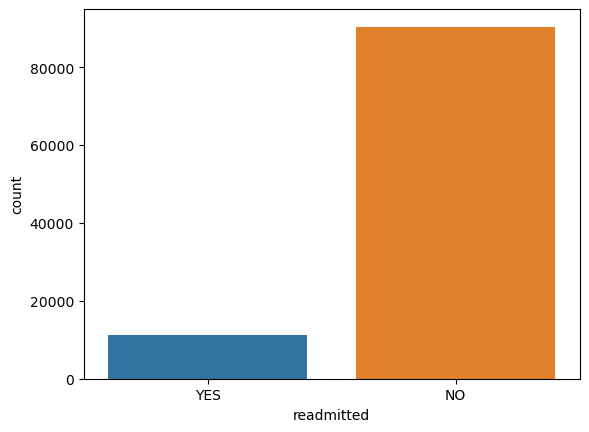

In [25]:
sns.countplot(x='readmitted', data=Y)
pass

Очевидно, что классы несбалансированы. В дальнейшем стоит попытаться устранить эту несбалансированность.

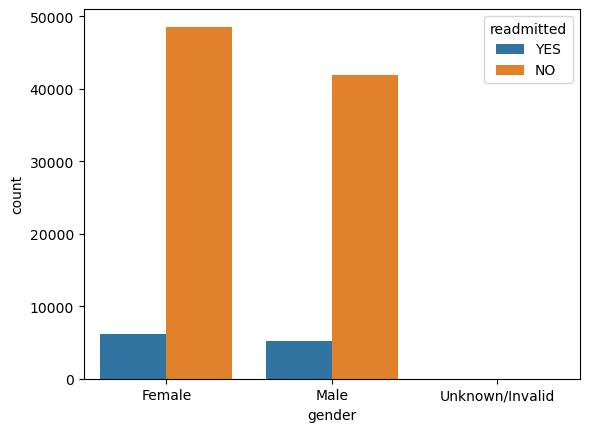

In [26]:
sns.countplot(x='gender', order=Y['gender'].value_counts().index, hue='readmitted', data=Y)
pass

В датасете преобладают женщины, кроме того, присутствуют невалидные значения, которые следует удалить для лучшей обработки данных.

In [27]:
rows_with_invalid_gender = Y[Y['gender'] == 'Unknown/Invalid']  # строки с невалидными значениями признака gender

len(rows_with_invalid_gender)  # число таких строк

3

Количество таких значений незначительно, поэтому их можно без проблем удалить (удалить соответствующие строки из таблицы).

In [28]:
Y.drop(rows_with_invalid_gender.index, axis=0, inplace=True)  # удаляем из таблицы

len(Y[Y['gender'] == 'Unknown/Invalid'])  # число строк с невалидными значениями признака gender после удаления

0

Посмотрим на возраст повторно госпитализируемых

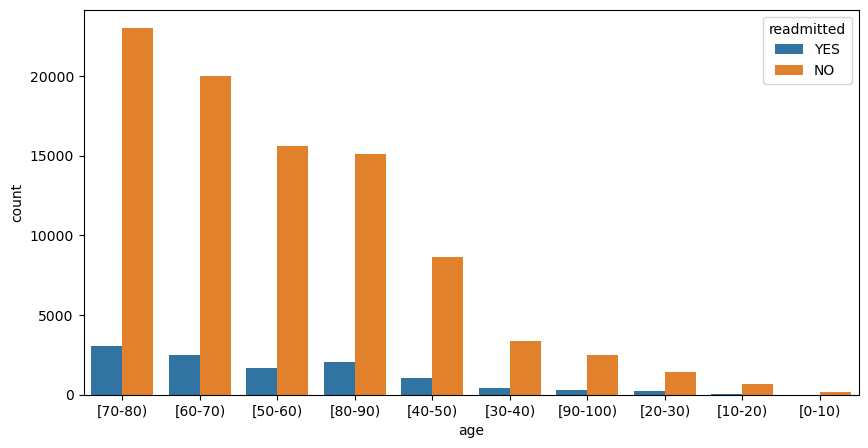

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(x='age', order=Y['age'].value_counts().index, hue='readmitted', data=Y)
pass

Наблюдается высокая частота посещений пожилыми пациентами, как среди тех, кто повторно госпитализировался, так и среди тех, кто не был повторно госпитализирован. Из этого возникает интересный вопрос о том, как именно оплачиваются медицинские услуги. Учитывая возрастное распределение среди пациентов, можно предположить, что большинство из них оплачивали медицинские услуги через страховку ([Medicare](https://en.wikipedia.org/wiki/Medicare_(United_States)))

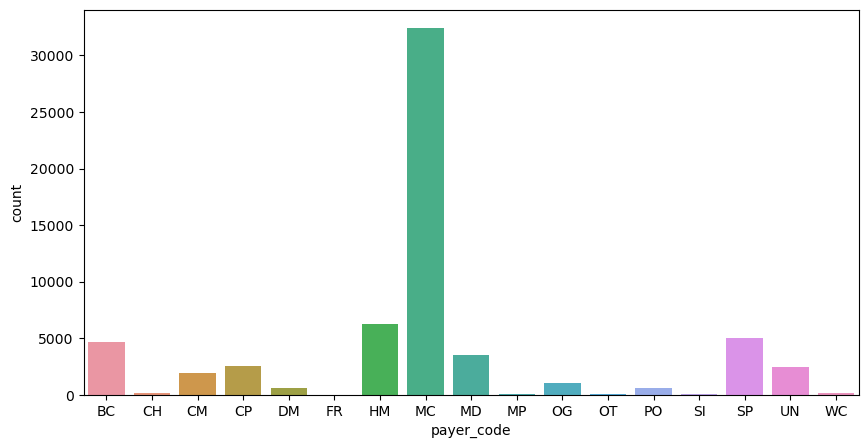

In [30]:
plt.figure(figsize=(10, 5))
sns.countplot(x='payer_code', data=Y)
pass

Да, MC (медицинская страховка для лиц от 65 лет и старше) - наиболее распространенный способ оплаты медицинских услуг.


Рассмотрим тип обращений

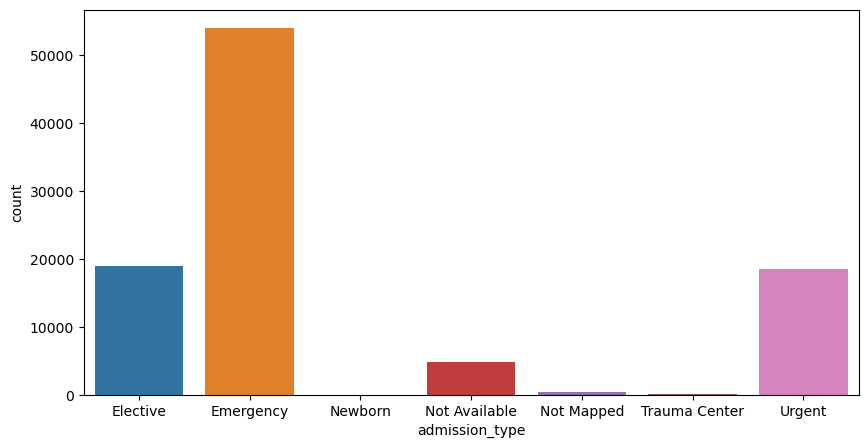

In [31]:
plt.figure(figsize=(10, 5))
sns.countplot(x='admission_type', data=Y)
pass

Большинство обращений было неотложными

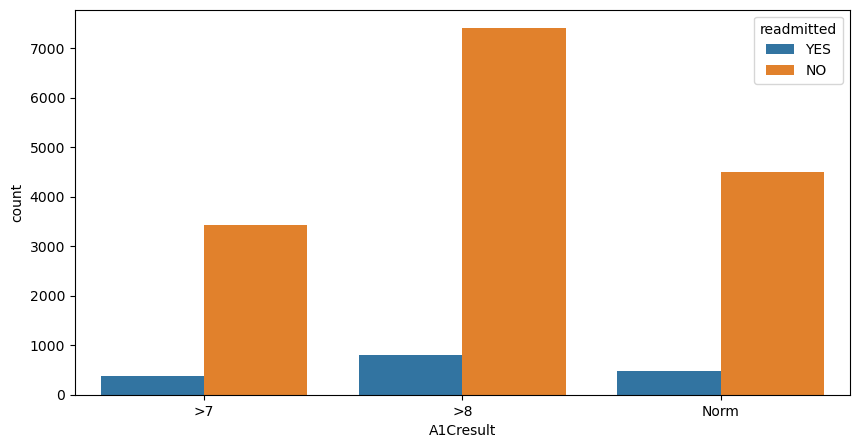

In [32]:
plt.figure(figsize=(10, 5))
sns.countplot(x='A1Cresult', hue='readmitted', data=Y)
pass

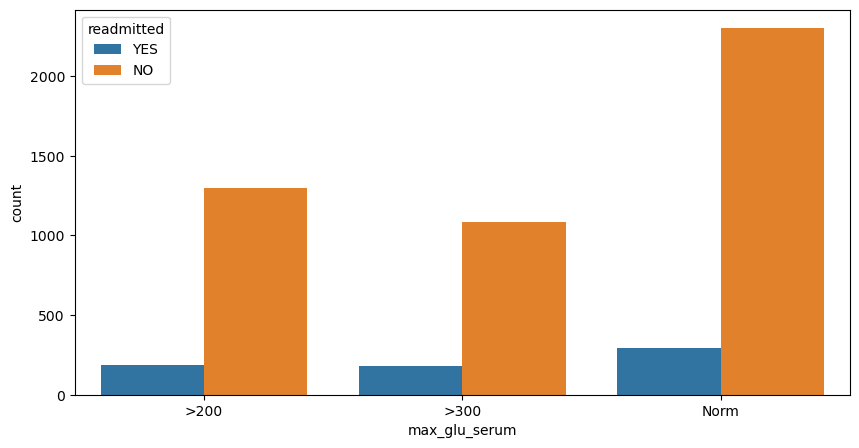

In [33]:
plt.figure(figsize=(10, 5))
sns.countplot(x='max_glu_serum', hue='readmitted', data=Y)
pass

Большинству пациентов не проводили тест на уровень гемоглобина (A1C) и глюкозу.

Построим графики зависимостей каждого количественного признака с каждым

In [23]:
#sns.pairplot(Y, hue='readmitted')

создадим матрицу корреляции для числовых характеристик и представим ее визуально

In [24]:
#corr_mat = Y.corr()
#
#sns.heatmap(corr_mat, cmap= 'viridis', linewidths=3, linecolor='white', square=True )
#pass

Среди количественных признаков сильно скореллированных не оказалось.

Продолжим с вычислением матрицы корреляции для всех признаков, применяя временную факторизацию категориальных признаков.

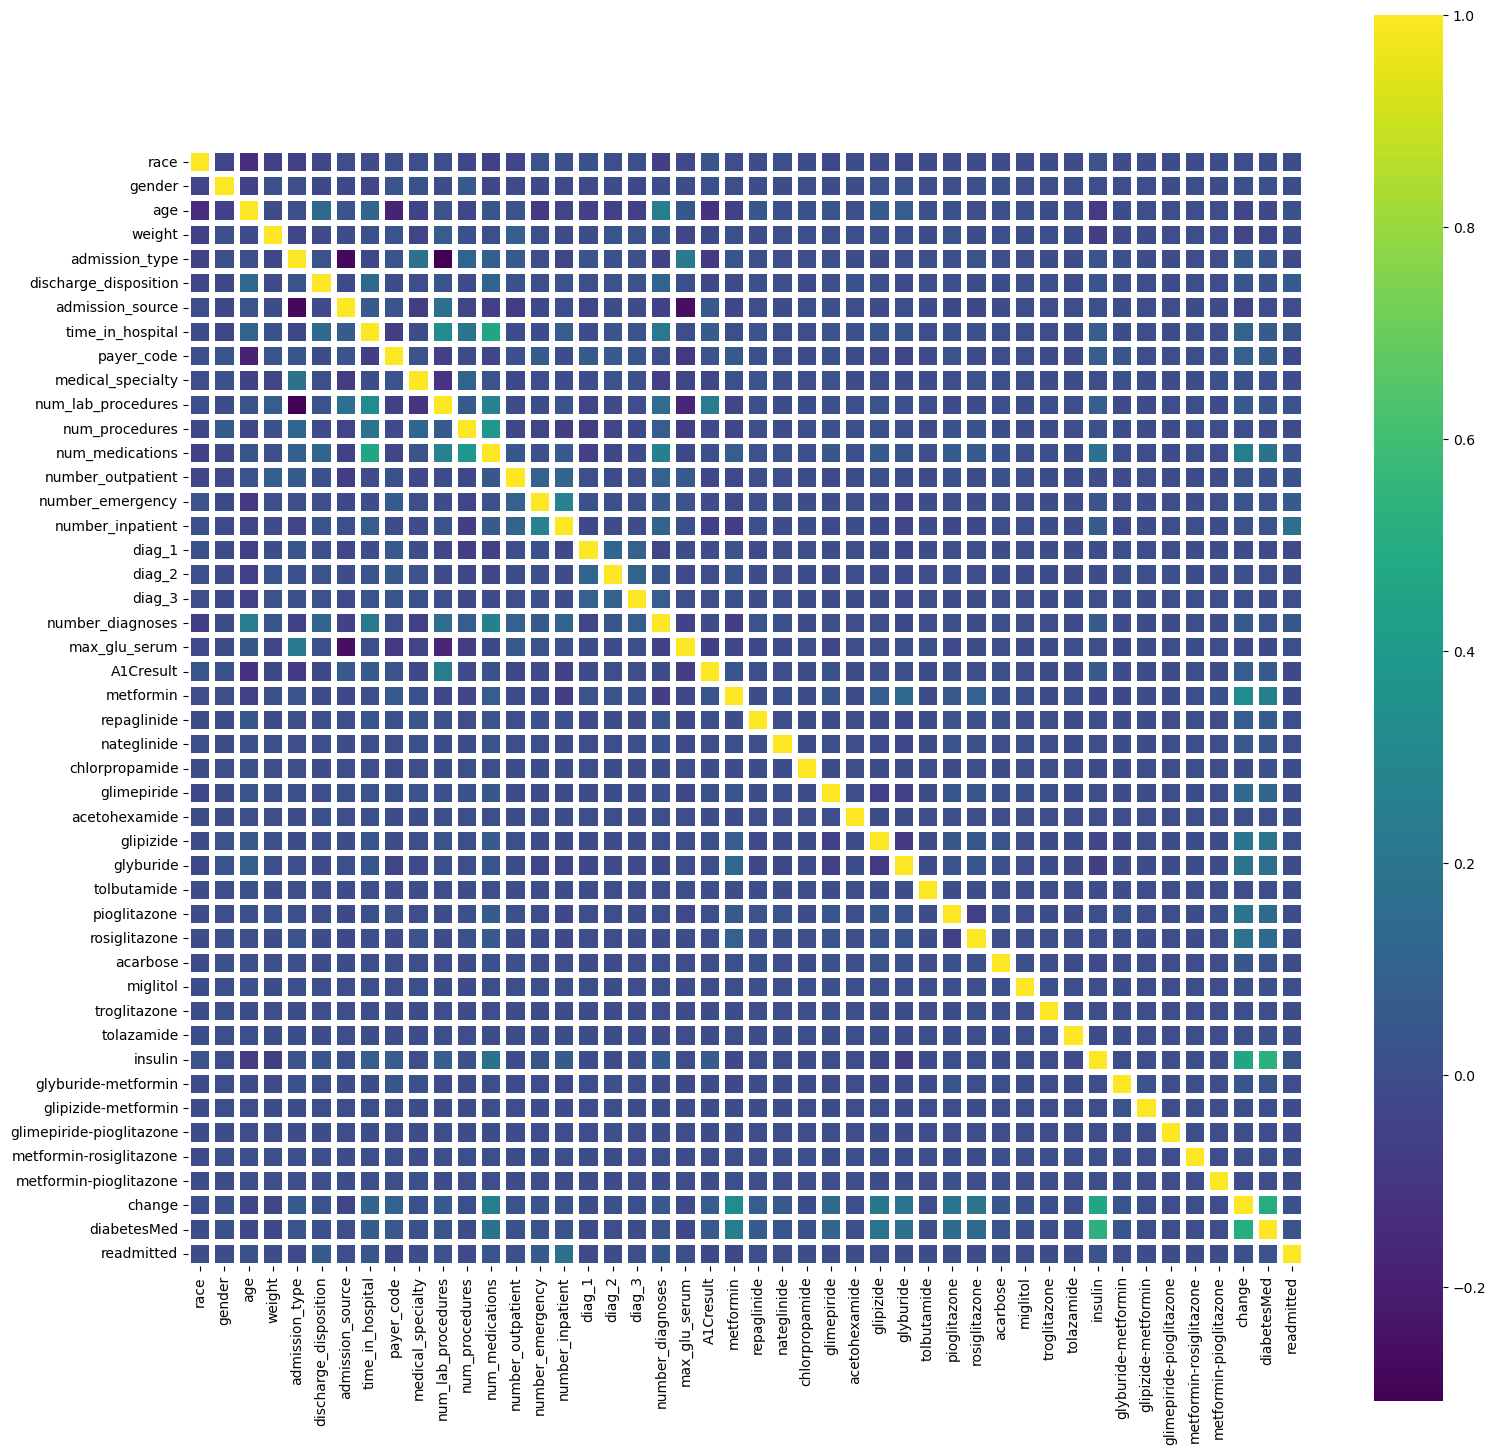

In [34]:
Y_f = Y.copy()
for column in Y_f.select_dtypes(['category']):
    Y_f[column] = pd.factorize(Y_f[column])[0]

corr_mat_f = Y_f.corr()

plt.figure(figsize=(18, 18))
sns.heatmap(corr_mat_f, cmap= 'viridis', linewidths=3, linecolor='white', square=True)
pass

Среди всех признаков сильно скореллированных тоже нет.
Выведем пары признаков, у которых коэффициенты корреляции превышают заданное значение.

In [35]:
corr_mat_f.where(np.triu(corr_mat_f > 0.35, k=1)).stack().sort_values(ascending=False)

insulin           diabetesMed        0.528249
change            diabetesMed        0.506360
insulin           change             0.468251
time_in_hospital  num_medications    0.466137
num_procedures    num_medications    0.385761
dtype: float64

Хотя у признаков нет сильной связи, можно сказать, что существует средняя взаимосвязь между insulin, change и diabetesMed. Это обусловлено тем, что инсулин обычно назначается как лекарство для лечения диабета. Также можно наблюдать связь между time_in_hospital и num_medications. Чем дольше пациент находится в больнице (по разным причинам, оставаясь при этом пациентом), тем больше лекарств ему требуется для выздоровления. Так же существует взимосвязь между num_procedures  (количество процедур) и num_medications (количество препаратов).

## Обработка пропущенных значений
Оценим количество пропущенных значений, содержащихся в данном датасете. 
Для этого посмотрим на процентное содержание пропущенных значений.

In [36]:
(Y.isna().sum() / Y.shape[0] * 100).sort_values(ascending=False)

weight                      96.858387
max_glu_serum               94.746617
A1Cresult                   83.276829
medical_specialty           49.081690
payer_code                  39.557600
admission_source             6.663522
admission_type               5.199336
discharge_disposition        3.627055
race                         2.231656
diag_3                       1.398347
diag_2                       0.351798
diag_1                       0.020636
acarbose                     0.000000
miglitol                     0.000000
troglitazone                 0.000000
rosiglitazone                0.000000
pioglitazone                 0.000000
tolazamide                   0.000000
glyburide-metformin          0.000000
insulin                      0.000000
glyburide                    0.000000
glipizide-metformin          0.000000
glimepiride-pioglitazone     0.000000
metformin-rosiglitazone      0.000000
metformin-pioglitazone       0.000000
change                       0.000000
diabetesMed 

Мы видим, что есть признаки, в которых нет пропущенных значений, и признаки, в которых пропущено >90% значений. Для числовых признаков нет пропущенных значений.

Так как для признаков race, diag_3, diag_2, diag_1 пропущенных значений меньше 3%, можно удалить из таблицы все строки, в которых встречаются соответствующие отсутствующие значения.

In [37]:
Y.dropna(subset=['race', 'diag_3', 'diag_2', 'diag_1'], inplace=True)
Y.shape

(98052, 46)

Так же удалим признак payer_code, ведь он, очевидно, не несет никакой смысловой нагрузки для нашей задачи, а пропущенных значений в нем почти 40%. Для нас данный признак не существенный.

Удалим и признак weight, так как он отсутвует практически в 97% процентов случаев и его восстановить просто невозможно.

In [38]:
Y.drop(['payer_code'], axis=1, inplace=True)
Y.shape

(98052, 45)

In [39]:
Y.drop(['weight'], axis=1, inplace=True)
Y.shape

(98052, 44)

Пропущенные значения признаков admission_source и admission_type можно заменить на существующее специальное значение 'Not Available'

In [40]:
Y['admission_source'].fillna('Not Available', inplace=True)
Y['admission_type'].fillna('Not Available', inplace=True)

Для оставшихся признаков discharge_disposition и medical_specialty специально добавим значение 'Not Available', на которое заменим пропущенные значения

In [41]:
Y['discharge_disposition'] = Y['discharge_disposition'].cat.add_categories('Not Available')
Y['discharge_disposition'].fillna('Not Available', inplace=True)

Y['medical_specialty'] = Y['medical_specialty'].cat.add_categories('Not Available')
Y['medical_specialty'].fillna('Not Available', inplace=True)

Теперь проверим пропущенные значения еще раз

In [42]:
(Y.isna().sum() / Y.shape[0] * 100).sort_values(ascending=False)

max_glu_serum               94.688533
A1Cresult                   83.485294
race                         0.000000
miglitol                     0.000000
acetohexamide                0.000000
glipizide                    0.000000
glyburide                    0.000000
tolbutamide                  0.000000
pioglitazone                 0.000000
rosiglitazone                0.000000
acarbose                     0.000000
troglitazone                 0.000000
chlorpropamide               0.000000
tolazamide                   0.000000
insulin                      0.000000
glyburide-metformin          0.000000
glipizide-metformin          0.000000
glimepiride-pioglitazone     0.000000
metformin-rosiglitazone      0.000000
metformin-pioglitazone       0.000000
change                       0.000000
diabetesMed                  0.000000
glimepiride                  0.000000
nateglinide                  0.000000
gender                       0.000000
repaglinide                  0.000000
age         

In [32]:
Y.describe(include=['category']).T

,count,unique,top,freq
race,98052,5,Caucasian,75079
gender,98052,2,Female,52833
age,98052,10,[70-80),25305
admission_type,98052,7,Emergency,52178
discharge_disposition,98052,26,Discharged to home,57609
admission_source,98052,16,Emergency Room,55951
medical_specialty,98052,73,Not Available,48318
diag_1,98052,713,428,6730
diag_2,98052,740,428,6517
diag_3,98052,786,250,11208


Теперь у нас появился признак, принимающий одно уникальное значение, и мы можем его безболезненно удалить, как делали немного выше

In [35]:
Y.drop(['metformin-rosiglitazone'], axis=1, inplace=True)

Y.shape

(98052, 43)

## Обработка категориальных признаков
### Получение числового признака age из категориального
Сначала обработаем признак age, который принимает значения в виде десятилетнего интервала

In [36]:
Y['age'].value_counts() 

age
[70-80)     25305
[60-70)     21809
[80-90)     16702
[50-60)     16697
[40-50)      9265
[30-40)      3548
[90-100)     2717
[20-30)      1478
[10-20)       466
[0-10)         65
Name: count, dtype: int64

Все интервалы выглядят следующим образом: $[10 * i; 10 * (i + 1))$ для всех i от 0 до 9. Соответственно, каждый такой интервал можно заменить на $10*i + 5*(i+1)$ для всех i от 0 до 9. Заменяем его на среднее значение интервала

In [37]:
age = Y['age'].copy()

for i in range(0, 10):
    interval_str = '[' + str(10 * i) + '-' + str(10 * (i + 1)) + ')'
    mean_of_interval = 10 * i + 10 * (i + 1) // 2
    age = age.replace(interval_str, mean_of_interval)  # заменяем интервал на среднее

age = pd.to_numeric(age)  # меняем тип на числовой
Y.drop(['age'], axis=1, inplace=True)  # удаляем из исходной таблицы старый категориальный признак age
Y = pd.concat([age, Y], axis=1)  # добавляем новый числовой признак age

In [38]:
Y.dtypes

age                            int64
race                        category
gender                      category
admission_type              category
discharge_disposition       category
admission_source            category
time_in_hospital               int64
medical_specialty           category
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
diag_1                      category
diag_2                      category
diag_3                      category
number_diagnoses               int64
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
chlorpropamide              category
glimepiride                 category
acetohexamide               category
glipizide                   category
g

Сохраним сейчас отдельно таблицу исключительно с количественными признаками (тех, для которых на данный момент dtype == int64). Далее это облегчит процесс нормализации данных, т.к. нормализируем мы только количественные признаки.

In [39]:
Y_num = Y.select_dtypes(['int64'])

In [40]:
Y_num

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
1,20,3,59,0,18,0,0,0,9
2,35,2,11,5,13,2,0,1,6
3,50,2,44,1,16,0,0,0,7
4,65,1,51,0,8,0,0,0,5
5,80,3,31,6,16,0,0,0,9
...,...,...,...,...,...,...,...,...,...
101761,110,3,51,0,16,0,0,0,9
101762,125,5,33,3,18,0,0,1,9
101763,110,1,53,0,9,1,0,0,13
101764,125,10,45,2,21,0,0,1,9


На данном этапе удалим из исходной таблицы все количественные признаки. Далее, после обработки категориальных признаков, просто объеденим таблицы.

In [41]:
Y.drop(Y_num, axis=1, inplace=True)

### Предварительная категоризация заболеваний

In [42]:
len(Y['diag_1'].unique())

713

In [43]:
len(Y['diag_2'].unique())

740

In [44]:
len(Y['diag_3'].unique())

786

Уникальных значений очень много. Так как это диагнозы, обратимся к таблице МКБ, определим диагнозы по категориям.

    Circulatory - Заболевания системы кровообращения (390–459, 785)
    Respiratory - Заболевания дыхательной системы (460–519, 786)
    Digestive - Заболевания пищеварительной системы (520–579, 787)
    Diabetes - Сахарный диабет (250.xx)
    Injury - Травмы и отравления (800–999)
    Musculoskeletal - Заболевания опорно-двигательного аппарата и соединительной ткани (710–739)
    Genitourinary - Заболевания мочеполовой системы (580–629, 788)
    Neoplasms - Новообразования (140–239)
    Other - Другие заболевания, не принадлежащие ни одной из вышеперечисленных категорий
    
Скопируем часть исходной таблицы с категориями диагнозов.

In [45]:
diags = ['diag_1', 'diag_2', 'diag_3']

Y_diags = Y[diags].copy()

In [46]:
diag_categories = [
    'Circulatory', 
    'Respiratory', 
    'Digestive', 
    'Diabetes', 
    'Injury', 
    'Musculoskeletal', 
    'Genitourinary', 
    'Neoplasms', 
    'Other'
]

for diag in diags:
    Y_diags[diag] = Y_diags[diag].cat.set_categories(diag_categories)

Напишем функцию для удобства категоризации: принимая на вход код МКБ9 (ICD9), на выходе возвращает название категории заболевания. Но не смотря на то, что мы избавились от пропущенных значений, все же есть валидные коды, начинающиеся с'E' и 'V'. Эти заболевания должны быть отнесены к категории 'Other'.

In [47]:
def get_diag_category(icd9_code: str) -> str:
    if icd9_code[0] == 'E' or icd9_code[0] == 'V':
        return 'Other'
    
    icd9_code = int(float(icd9_code))
    
    if 390 <= icd9_code <= 459 or icd9_code == 785:
        return 'Circulatory'
    if 460 <= icd9_code <= 519 or icd9_code == 786:
        return 'Respiratory'
    if 520 <= icd9_code <= 579 or icd9_code == 787:
        return 'Digestive'
    if icd9_code == 250:
        return 'Diabetes'
    if 800 <= icd9_code <= 999:
        return 'Injury'
    if 710 <= icd9_code <= 739:
        return 'Musculoskeletal'
    if 580 <= icd9_code <= 629 or icd9_code == 788:
        return 'Genitourinary'
    if 140 <= icd9_code <= 239:
        return 'Neoplasms'
    
    return 'Other'

In [48]:
for index, row in Y.iterrows():
    for diag in diags:
        Y_diags.loc[index, diag] = get_diag_category(Y.loc[index, diag])

In [49]:
Y_diags.T

,1,2,3,4,5,6,7,8,9,10,...,101756,101757,101758,101759,101760,101761,101762,101763,101764,101765
diag_1,Other,Other,Other,Neoplasms,Circulatory,Circulatory,Circulatory,Circulatory,Circulatory,Diabetes,...,Injury,Respiratory,Other,Circulatory,Other,Diabetes,Digestive,Other,Injury,Digestive
diag_2,Diabetes,Diabetes,Diabetes,Neoplasms,Circulatory,Circulatory,Respiratory,Circulatory,Neoplasms,Circulatory,...,Genitourinary,Respiratory,Other,Other,Circulatory,Other,Other,Genitourinary,Other,Digestive
diag_3,Other,Other,Circulatory,Diabetes,Diabetes,Other,Diabetes,Other,Respiratory,Injury,...,Circulatory,Respiratory,Other,Diabetes,Circulatory,Circulatory,Digestive,Other,Injury,Digestive


Мы разбили заболевания на различные категории, но признаки могут принимать значения не всех кодов заболеваний, поэтому возникают неиспользуемые категории. Избавимся от них, чтобы в дальнейшем уменьшить размерности векторов.

In [50]:
for diag in diags:
    Y_diags[diag] = Y_diags[diag].cat.remove_unused_categories()

In [51]:
Y.drop(diags, axis=1, inplace=True)    # удаляем из исходной таблицы исходные признаки diag_1, diag_2, diag_3
Y = pd.concat([Y, Y_diags], axis=1)  # добавляем новые признаки diag_1, diag_2, diag_3

Y.describe(include=['category']).T

,count,unique,top,freq
race,98052,5,Caucasian,75079
gender,98052,2,Female,52833
admission_type,98052,7,Emergency,52178
discharge_disposition,98052,26,Discharged to home,57609
admission_source,98052,16,Emergency Room,55951
medical_specialty,98052,73,Not Available,48318
max_glu_serum,5208,3,Norm,2532
A1Cresult,16193,3,>8,7631
metformin,98052,4,No,78807
repaglinide,98052,4,No,96529


иии я запутался. Продолжение следует...

### Кодирование номинальных  признаков
заменим бинарные прихнаки на числовые: 0 и 1

In [52]:
cat_columns = Y.select_dtypes(['category'])

for column in cat_columns:
    if Y[column].nunique() == 2:
        Y[column] = Y.factorize(df[column])[0]

AttributeError: 'DataFrame' object has no attribute 'factorize'